## Logistic, Random forest, or KNN? (Core)
Jonathan Jones

1) Use a logistic regression model and try both l1 and l2 regularization. This is a great opportunity to see how tuning hyperparameters can affect the model results. 

2) After doing that, try using KNN and Random Forest models. 

3) Address these questions in a text cell at the end of your code:

Which model performed the best? 
Which hyperparameters did you tune for each of the models? Is there a model that you liked the best and why?

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Import Data:

filename = '/content/drive/MyDrive/Colab Notebooks/Week 7/Wine_cultivars.csv'

# Preliminary Check:

df = pd.read_csv(filename)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.shape

(178, 14)

In [ ]:
# Checking for duplicated rows:

df.duplicated().sum()

0

In [ ]:
# Checking for missing values: 

df.isna().sum()

Class label                     0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavonid phenols             0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [ ]:
# Checking column quantiy, column names, index position,  and datatype:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavonid phenols           178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [ ]:
# Changing column names to lower case text for ease with referencing:

df.columns = df.columns.str.lower()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class label                   178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity of ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavonid phenols           178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315 of diluted wines  178 non-null    float64
 13  proli

In [ ]:
# Validation Split: 

X = df.drop(columns = 'class label')
y = df['class label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

In [ ]:
# Checking the class balance: 

y_train.value_counts(normalize = True)

2    0.398496
1    0.330827
3    0.270677
Name: class label, dtype: float64

Logistic Regression

In [ ]:
# Logistic Regression:

# Preprocessors
LR = LogisticRegression(C=1)
SS = StandardScaler()

# Constructing pipe_line:
LR_PL = make_pipeline(SS, LR)

# Fitting the data
LR_PL.fit(X_train, y_train)

LR_PL.get_params()

{'logisticregression': LogisticRegression(C=1),
 'logisticregression__C': 1,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False,
 'memory': None,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression(C=1))],
 'verbose': False}

In [ ]:
# Assessing model performance: 

print(LR_PL.score(X_train, y_train))
print(LR_PL.score(X_test, y_test))

LR_score = LR_PL.score(X_test, y_test)

1.0
1.0


l1 Regularization

In [ ]:
# Tuning model using L1 Regularization:
Cvals = [0.001, 0.01, 1, 10, 100]
l1_train_scores = []
l1_test_scores = []

# Loop that will iterate through c values:
for i in Cvals:

# Instantiate model:
  LRl1 = LogisticRegression(C= i, max_iter=1000, solver = 'liblinear', penalty = 'l1')
  LRl1_PL = make_pipeline(SS, LRl1)

# Fitting:
  LRl1_PL.fit(X_train, y_train)

# Adding training and test scores to the list above 
  l1_train_scores.append(LRl1_PL.score(X_train, y_train))
  l1_test_scores.append(LRl1_PL.score(X_test, y_test))

l1_scores = {c:score for c, score in zip(Cvals, l1_test_scores)}

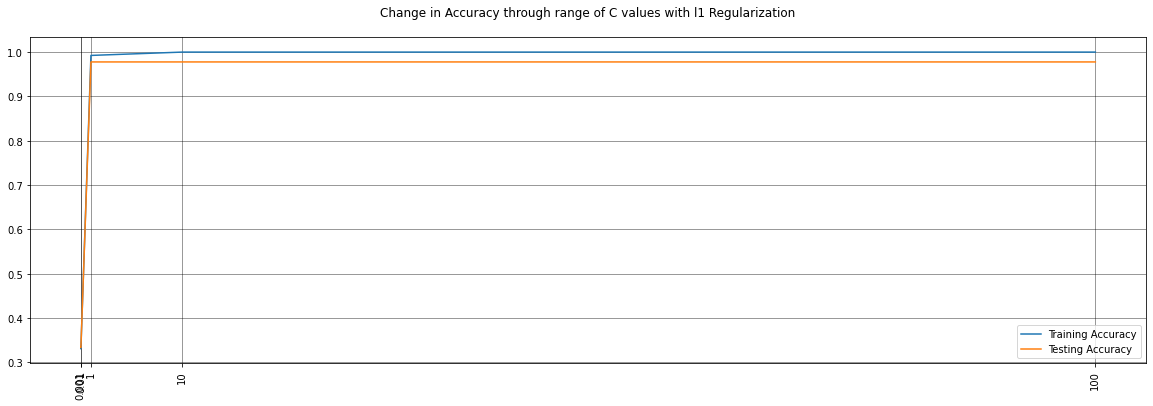

In [ ]:
# Plotting changes in accuray:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(20,6))

ax.plot(Cvals, l1_train_scores, label = 'Training Accuracy')
ax.plot(Cvals, l1_test_scores, label ='Testing Accuracy')
ax.set_xticks(Cvals)
ax.set_xticklabels(labels=Cvals, rotation = 90)
ax.set_title('Change in Accuracy through range of C values with l1 Regularization\n')
ax.legend()
ax.grid(color='black', alpha = .5)

l2 Regularization

In [ ]:
# Tuning model using L1 Regularization:
cvals = [0.001, 0.01, 1, 10, 100]
l2_train_scores = []
l2_test_scores = []

# Loop that will iterate through c values:
for i in Cvals:

# Instantiate model:
  LRl2 = LogisticRegression(C= i, max_iter=1000, solver = 'liblinear', penalty = 'l2')
  LRl2_PL = make_pipeline(SS, LRl2)

# Fitting:
  LRl2_PL.fit(X_train, y_train)

# Adding training and test scores to the list above 
  l2_train_scores.append(LRl2_PL.score(X_train, y_train))
  l2_test_scores.append(LRl2_PL.score(X_test, y_test))

l2_scores = {c:score for c, score in zip(cvals, l2_test_scores)}

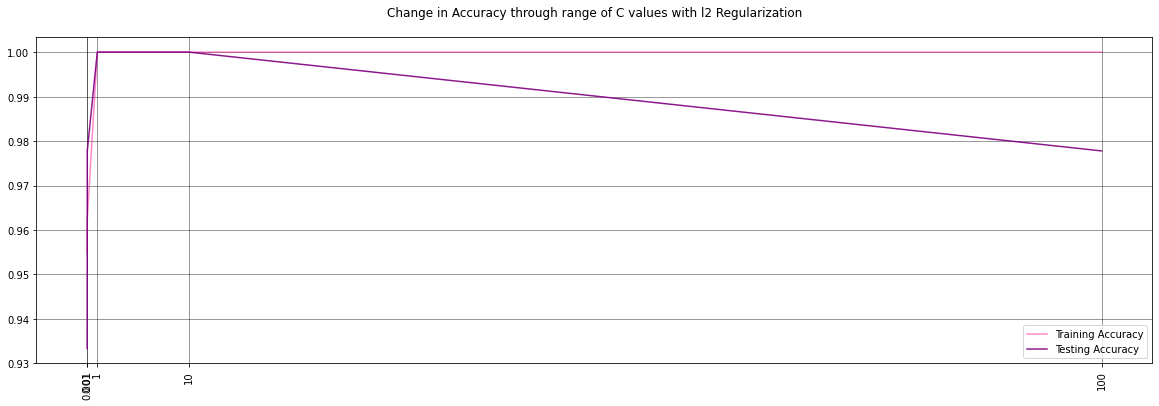

In [ ]:
# Plotting changes in accuray:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(20,6))

ax.plot(cvals, l2_train_scores, label = 'Training Accuracy', color='deeppink', alpha = .5)
ax.plot(cvals, l2_test_scores, label ='Testing Accuracy', color='purple', alpha = .9)
ax.set_xticks(cvals)
ax.set_xticklabels(labels=cvals, rotation = 90)
ax.set_title('Change in Accuracy through range of C values with l2 Regularization\n')
ax.legend()
ax.grid(color='black', alpha = .5)

KNN Modeling 

In [ ]:
# Preprocessors:
KNN = KNeighborsClassifier(n_neighbors=1)
scaler = StandardScaler()

# Constructing pipe_line:
KNN_PL = make_pipeline(scaler, KNN)

# Fitting the data:
KNN_PL.fit(X_train, y_train)


# Predictions:

KNN_train_pred = KNN_PL.predict(X_train)
KNN_test_pred = KNN_PL.predict(X_test)

KNN_train_acc = accuracy_score(y_train, KNN_train_pred)
KNN_test_acc = accuracy_score(y_test, KNN_test_pred)

In [ ]:
KNN_PL.get_params()

{'kneighborsclassifier': KNeighborsClassifier(n_neighbors=1),
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 1,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform',
 'memory': None,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False}

In [ ]:
# Tunning the model:
# Lists for hyperparameters:
l_val = [] # leaf size
n_val = [] # n neighbors
w_weight = [] # weights
AS = []

# Loop that will iterate through c values:
for l in range(25, 35):
  for n in range(1, 100):
    for w in ['uniform']:

# Instantiate model:
      KNN = KNeighborsClassifier(n_neighbors= n, leaf_size= l, weights = w)

# Constructing pipe_line:      
      KNN_PL = make_pipeline(scaler, KNN)
      KNN_PL.fit(X_train, y_train)
      test_score = KNN_PL.score(X_test, y_test)

# Adding test scores to the list above: 
      l_val.append(l)
      n_val.append(n)
      w_weight.append(w)
      AS.append(test_score)


In [ ]:
# Test Score Data Frame"

test_accuracy_df = pd.DataFrame()
test_accuracy_df['leaf_size'] = l_val
test_accuracy_df['n_neighbors'] = n_val
test_accuracy_df['weights'] = w_weight
test_accuracy_df['accuracy_score'] = AS

test_accuracy_df.shape

test_accuracy_df.sort_values(by ='accuracy_score', ascending=False)
test_accuracy_df.iloc[709]

leaf_size              32
n_neighbors            17
weights           uniform
accuracy_score        1.0
Name: 709, dtype: object

Random Forrest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Preprocessors:
RF = RandomForestRegressor(random_state=42)
scaler = StandardScaler()

# Constructing pipe_line:
RF_PL = make_pipeline(scaler, RF)

# Fitting the data:
RF_PL.fit(X_train, y_train)


# Predictions:

RF_train_score = RF_PL.score(X_train, y_train)
RF_test_score = RF_PL.score(X_test, y_test)

In [ ]:
RF_PL.get_params()

{'memory': None,
 'randomforestregressor': RandomForestRegressor(random_state=42),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_score': False,
 'randomforestregressor__random_state': 42,
 'randomforestregressor__verbose': 0,
 'randomforestregressor__warm_start': False,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std':

In [ ]:
from sklearn.model_selection import GridSearchCV

# Construct pipe_line:

RF_pipe = make_pipeline(StandardScaler(), RandomForestRegressor())

# Populate hyperparameter dictionary: 

parameter_dict = {'randomforestregressor__max_depth': range(1,5), 
                  'randomforestregressor__max_leaf_nodes': range(1,5)}

RFgridsearch = GridSearchCV(RF_pipe, parameter_dict)

RFgridsearch.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packag

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': range(1, 5),
                         'randomforestregressor__max_leaf_nodes': range(1, 5)})

In [ ]:
best_PL = RFgridsearch.best_estimator_

RF_best = RFgridsearch.best_params_

RF_best_Score = best_PL.score(X_test, y_test)

print('Best Random Forest Parameters:\n', RF_best )
print('\n')
print(f'Accuracy of the best model is: ', RF_best_Score)

Best Random Forest Parameters:
 {'randomforestregressor__max_depth': 4, 'randomforestregressor__max_leaf_nodes': 4}


Accuracy of the best model is:  0.958915289580343


Score Comparison from the Various Models

In [ ]:
print('Logistic Regression Test Score:', LR_score)
print('\n')
print('Logistic Regression with l1 Regualarization Test Score:\n', l1_scores)
print('\n')
print('Logistic Regression with l2 Regualarization Test Score:\n', l2_scores)
print('\n')
print('KNN test score:\n', test_accuracy_df.iloc[709])
print('\n')
print('Random Forest Test score:\n', RF_best_Score)

Logistic Regression Test Score: 1.0


Logistic Regression with l1 Regualarization Test Score:
 {0.001: 0.3333333333333333, 0.01: 0.3333333333333333, 1: 0.9777777777777777, 10: 0.9777777777777777, 100: 0.9777777777777777}


Logistic Regression with l2 Regualarization Test Score:
 {0.001: 0.9333333333333333, 0.01: 0.9777777777777777, 1: 1.0, 10: 1.0, 100: 0.9777777777777777}


KNN test score:
 leaf_size              32
n_neighbors            17
weights           uniform
accuracy_score        1.0
Name: 709, dtype: object


Random Forest Test score:
 0.958915289580343


The Logistic Regression and KNN models perfomred the best with test scores of 1.0.

I tunned the 'c' values both l1 and l2 Regularization both models were fed the same range of c values: 0.001, 0.01, 1, 10, 100, and the l1 reg. model performed better. 

For the K-Nearest Neighbors model I used a for loop to iterate through 
three parameters, leaf size, number of neighbors and weight to provide the optimal model. 

Max_depth and leaf_nodes were used through the GridSearch class to produce a better model. I had was limited to short ranges and two parameters at a time in order to avoid long runtimes. 

The KNN model and Random Forest models were my favorite becuase of their flexibility with the nested for loop and Gridsearch. 
